In [37]:
import pandas as pd

In [38]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [39]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705


In [40]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [41]:
confirmed['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [42]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
6/9/21                  84050
6/10/21                 85892
6/11/21                 87716
6/12/21                 88740
6/13/21                 89861
Name: 0, Length: 513, dtype: object

In [43]:
# armazenando a data mais atual (última)
last_date = '6/12/21'

In [44]:
confirmed['Country/Region'].value_counts()

China                   34
Canada                  16
France                  12
United Kingdom          12
Australia                8
                        ..
Congo (Kinshasa)         1
Saint Lucia              1
Monaco                   1
United Arab Emirates     1
Bangladesh               1
Name: Country/Region, Length: 193, dtype: int64

In [45]:
# valor falso pois o erro é muito grande
# descartaremos esta análise pois tem muito campo vazio (muita disparidade no padrão)
confirmed['Country/Region'].value_counts()

China                   34
Canada                  16
France                  12
United Kingdom          12
Australia                8
                        ..
Congo (Kinshasa)         1
Saint Lucia              1
Monaco                   1
United Arab Emirates     1
Bangladesh               1
Name: Country/Region, Length: 193, dtype: int64

In [46]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705


In [47]:
confirmed_by_country.loc["China"][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
6/9/21     103261.0
6/10/21    103285.0
6/11/21    103320.0
6/12/21    103357.0
6/13/21    103380.0
Name: China, Length: 509, dtype: float64

In [48]:
import matplotlib.pyplot as plt

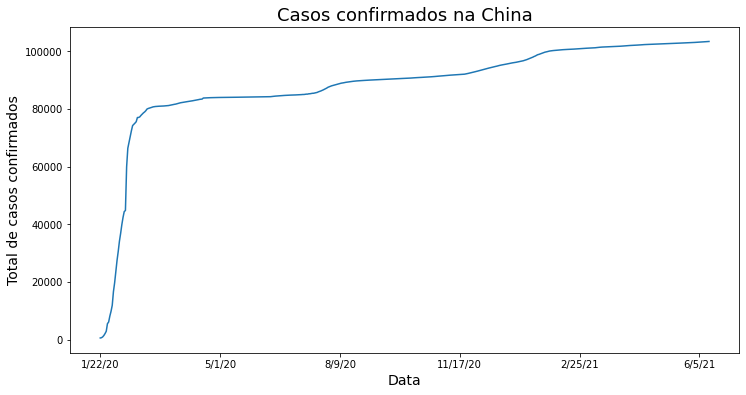

In [49]:
# casos confirmados cumulativos na China
# compara o momento inicial ao momento atual

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

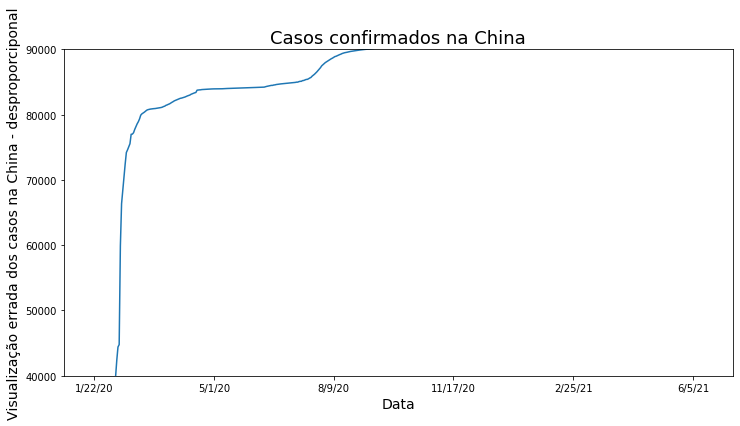

In [50]:
# limitando o eixo y
# mensagem ruim a quem está visualizando o gráfico

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Visualização errada dos casos na China - desproporciponal', fontsize = 14)
plt.ylim(40000, 90000)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

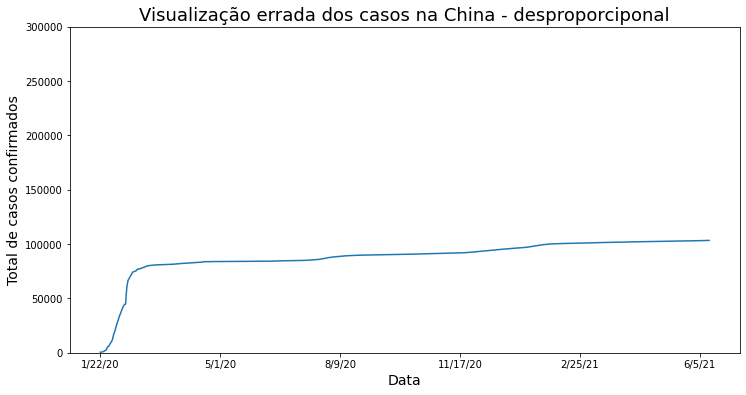

In [51]:
# mensagem ruim a quem está visualizando o gráfico
# compara o momento inicial com 300 mil

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.ylim(0, 300000)
plt.title('Visualização errada dos casos na China - desproporciponal', fontsize = 18)
plt.show()

In [52]:
# casos confirmados por dia na China
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()

In [53]:
new_cases_china.describe()

count      508.000000
mean       202.425197
std        891.674791
min         -1.000000
25%         19.000000
50%         31.000000
75%         88.250000
max      15136.000000
Name: China, dtype: float64

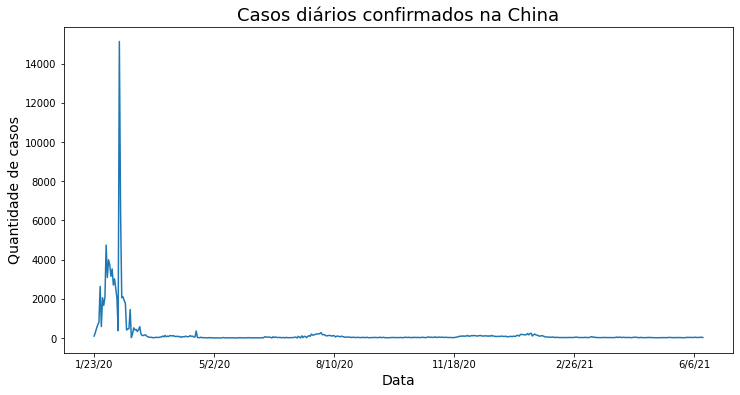

In [54]:
# gráfico dos casos diários na China
plt.figure(figsize = (12, 6))
new_cases_china.plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos diários confirmados na China', fontsize = 18)
plt.show()

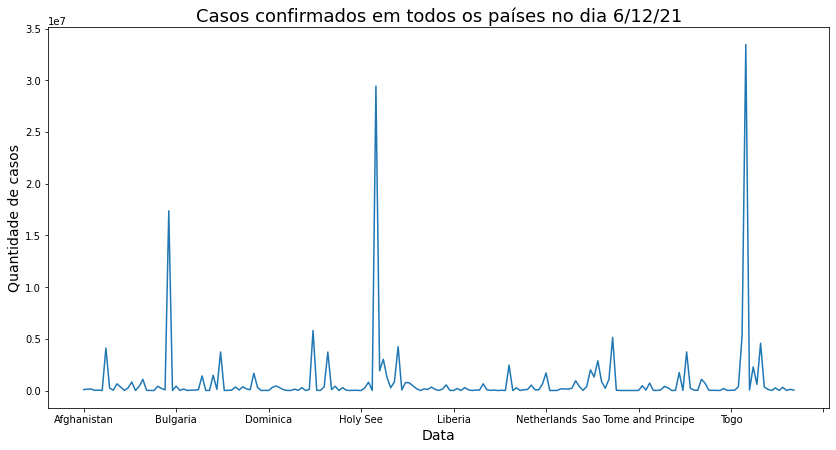

In [55]:
# últimos casos confirmados em cada país
plt.figure(figsize = (14, 7))
confirmed_by_country[last_date].plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

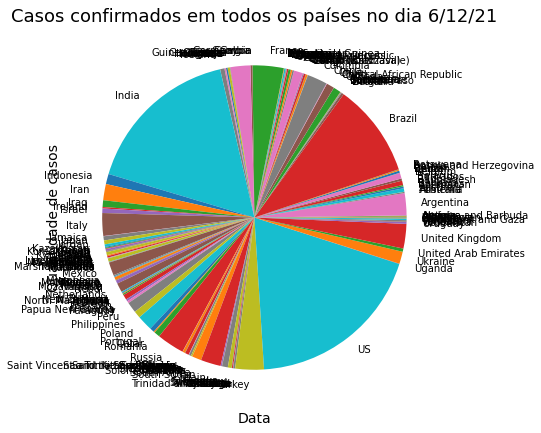

In [56]:
# QUASE SEMPRE DEVEMOS EVITAR GRÁFICO DE PIZZA
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'pie')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

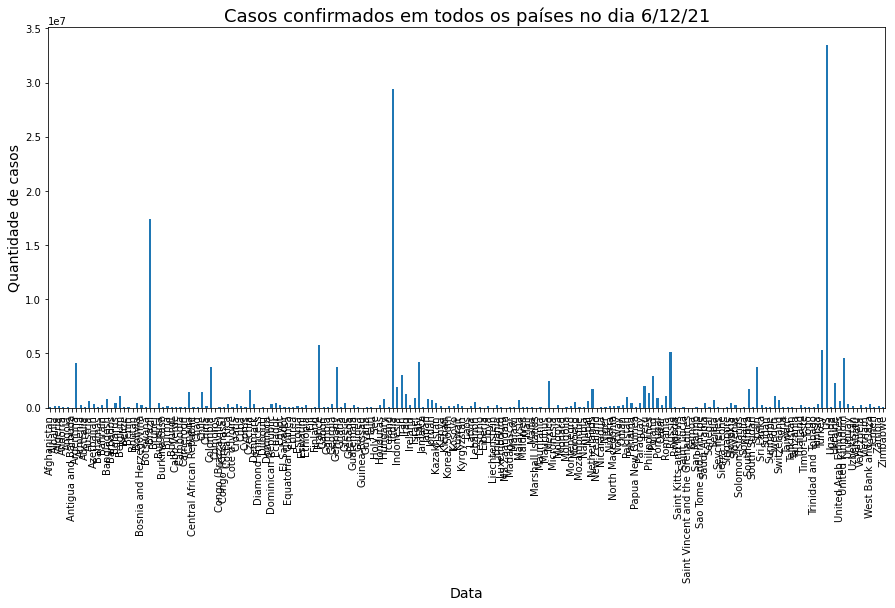

In [57]:
#gráfico de barra
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

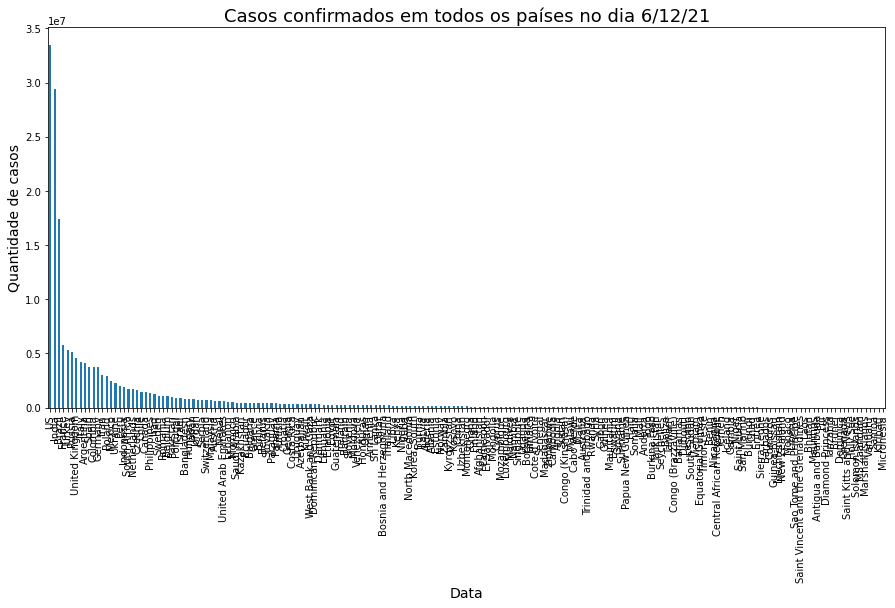

In [58]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False).plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

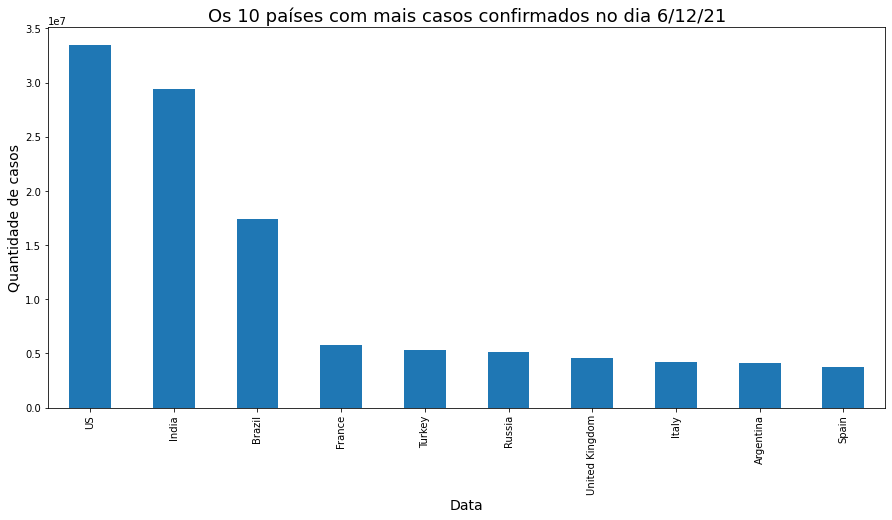

In [59]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False)[0:10].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Os 10 países com mais casos confirmados no dia {}'.format(last_date), fontsize = 18)
plt.show()

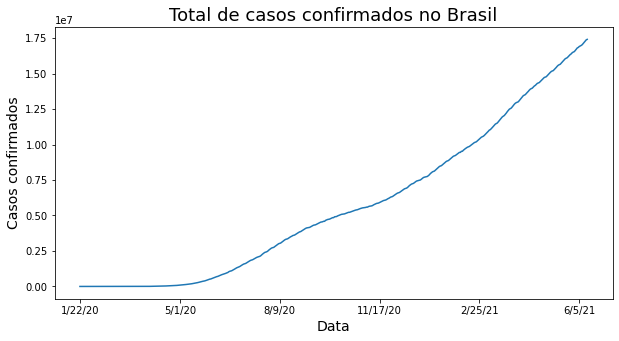

In [60]:
# casos confirmados cumulativos na Brasil
plt.figure(figsize = (10, 5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Casos confirmados', fontsize = 14)
plt.title('Total de casos confirmados no Brasil', fontsize = 18)
plt.show()

In [61]:
# mortos e recuperados no mundo
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [62]:
# casos de morte e recuperados no mundo
deaths_by_country = deaths.groupby('Country/Region').sum()
recovered_by_country = recovered.groupby('Country/Region').sum()

In [63]:
display(recovered.head())
display(deaths.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53750,53961,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741,57963,58070,58144,58265,58622,58998,59569,59871,60280,60598,60939,61410
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113468,114362,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473,129521,129566,129598,129627,129664,129702,129736,129761,129785,129807,129826,129842
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,85869,86007,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057,90281,90517,90767,90995,91198,91413,91651,91894,92132,92384,92620,92852
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12884,12900,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479,13507,13527,13527,13527,13527,13557,13557,13569,13578,13591,13591,13591
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24492,24503,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190,28264,28646,28802,28866,28880,29329,29368,29553,29960,30101,30207,30282


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2654,2664,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899,2919,2944,2973,3007,3034,3068,3104,3145,3187,3251,3305,3356,3412,3449,3527
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2403,2406,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449,2450,2451,2451,2451,2451,2451,2451,2451,2452,2452,2452,2452,2453,2453,2453
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3299,3307,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460,3465,3472,3480,3490,3497,3504,3510,3518,3527,3537,3544,3552,3560,3565,3571
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,618,622,628,630,633,636,639,645,649,651,655,659,677,685,696,704,709,715,725,731,735,742,745,749,757,764,766,772,780,784,788,794,797,800,803,811,815,819,825,831


In [67]:
# função que retorna a última data agrupada por país
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

display(latest_by_country(confirmed))
display(latest_by_country(deaths))
display(latest_by_country(recovered))

Country/Region
Afghanistan            89861
Albania               132459
Algeria               133388
Andorra                13813
Angola                 36705
                       ...  
Vietnam                10630
West Bank and Gaza    311534
Yemen                   6862
Zambia                111746
Zimbabwe               39959
Name: 6/13/21, Length: 193, dtype: int64

Country/Region
Afghanistan           3527
Albania               2453
Algeria               3571
Andorra                127
Angola                 831
                      ... 
Vietnam                 59
West Bank and Gaza    3533
Yemen                 1349
Zambia                1389
Zimbabwe              1632
Name: 6/13/21, Length: 193, dtype: int64

Country/Region
Afghanistan            61410
Albania               129842
Algeria                92852
Andorra                13591
Angola                 30282
                       ...  
Vietnam                 3998
West Bank and Gaza    303813
Yemen                   3743
Zambia                 97756
Zimbabwe               37004
Name: 6/13/21, Length: 193, dtype: int64

In [68]:
# chamando a função e colocando num DataFrame
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis = 1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,89861,3527,61410
Albania,132459,2453,129842
Algeria,133388,3571,92852
Andorra,13813,127,13591
Angola,36705,831,30282
...,...,...,...
Vietnam,10630,59,3998
West Bank and Gaza,311534,3533,303813
Yemen,6862,1349,3743


## Taxa de letalidade:

In [89]:
# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_1 * 100))
print('A segunda estimativa (pessimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_2 * 100))

A primeira estimativa (otimista) da taxa de letalidade é: 2.162%
A segunda estimativa (pessimista) da taxa de letalidade é: 3.229%


In [116]:
# função que retorna uma data específica agrupada por país
def latest_by_country_at(data, date):
  return data.groupby('Country/Region').sum()[date]

# chamando a função e colocando num DataFrame
informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis = 1)
combined_2_20_20.columns = ['confirmed', 'deaths', 'recovered']


# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined_2_20_20.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_1 * 100))
print('A segunda estimativa (pessimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_2 * 100))


A primeira estimativa (otimista) da taxa de letalidade é: 2.950%
A segunda estimativa (pessimista) da taxa de letalidade é: 11.005%


In [118]:
# usando uma data anterior de confirmados como referência
def latest_by_country_at(data, date):
  return data.groupby('Country/Region').sum()[date]

# chamando a função e colocando num DataFrame: DATA ANTERIOR
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis = 1)
combined_12.columns = ['confirmed', 'deaths', 'recovered']


# taxa de letalidade expressa em porcentagem %
# muito difícil falar em letalidade de uma doença durante uma pandemia
sum_up = combined_12.loc['China']
letality_rate_3 = sum_up['deaths'] / sum_up['confirmed']
print('A primeira estimativa (otimista) da taxa de letalidade é: {:.3f}%'.format(letality_rate_3 * 100))
display(sum_up)

A primeira estimativa (otimista) da taxa de letalidade é: 6.079%


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [88]:
# letalidade por país
letality_rate_1 = combined['deaths'] / combined['confirmed']
letality_rate_2 = combined['deaths'] / (combined['deaths'] + combined['recovered'])
combined['letality_rate_1'] = letality_rate_1
combined['letality_rate_2'] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,89861,3527,61410,0.039250,0.054314
Albania,132459,2453,129842,0.018519,0.018542
Algeria,133388,3571,92852,0.026772,0.037035
Andorra,13813,127,13591,0.009194,0.009258
Angola,36705,831,30282,0.022640,0.026709


In [90]:
# ordenando por taxa de  letalidade
combined.sort_values('letality_rate_1', ascending = False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,0.250000,0.250000
MS Zaandam,9,2,7,0.222222,0.222222
Yemen,6862,1349,3743,0.196590,0.264925
Peru,2003625,188708,1962124,0.094183,0.087737
Mexico,2454176,230150,1954251,0.093779,0.105361
Sudan,36203,2732,29994,0.075463,0.083481
Syria,24814,1810,21675,0.072943,0.077070
Egypt,273182,15623,201038,0.057189,0.072108
Somalia,14817,774,7043,0.052237,0.099015


<Figure size 1008x432 with 0 Axes>

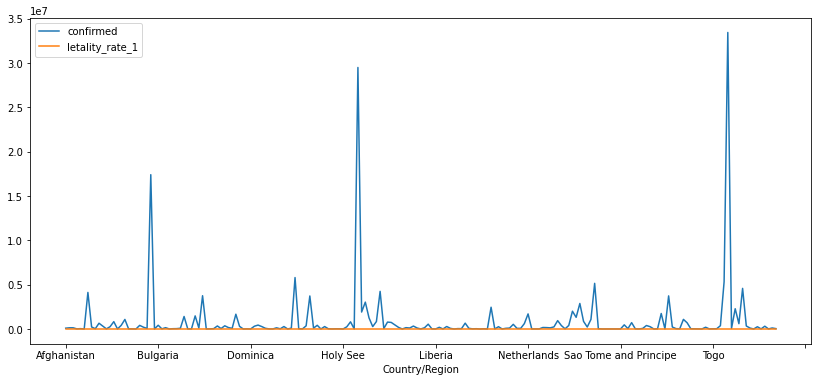

In [97]:
# péssima forma de visualizar, casos confirmados >>> taxa de letalidade (quase 0)
combined[['confirmed', 'letality_rate_1']].plot(figsize = (14, 6))

In [98]:
import seaborn as sns

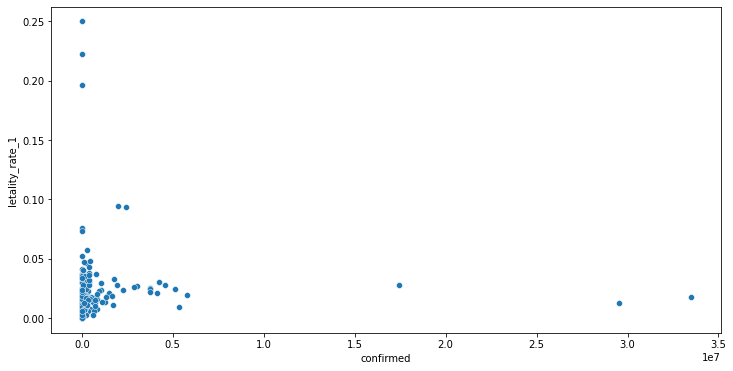

In [100]:
# scaaterplot
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined, x = 'confirmed', y = 'letality_rate_1')

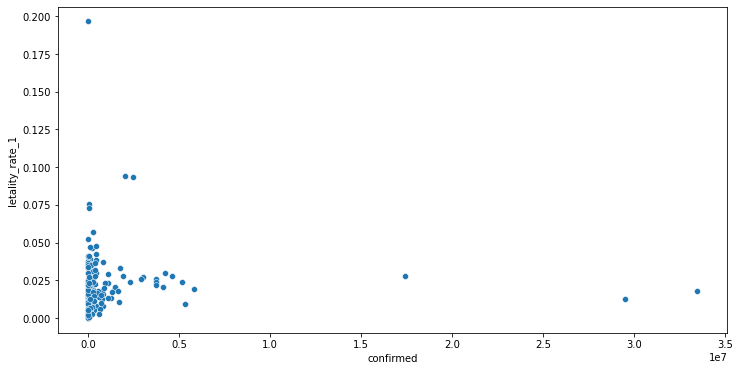

In [104]:
# apenas os países com mais de 40 casos confirmados
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined.query('confirmed > 40'), x = 'confirmed', y = 'letality_rate_1')

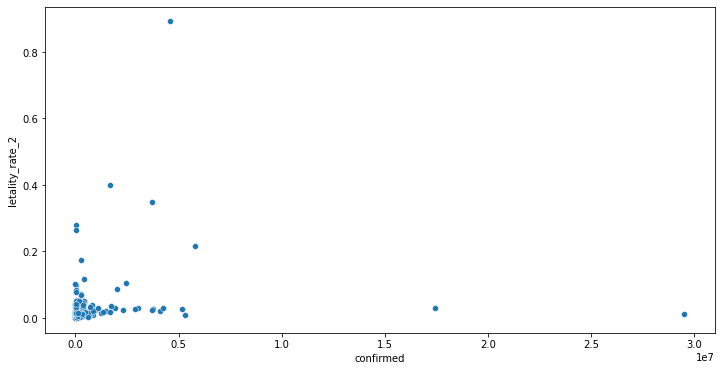

In [107]:
# letality_rate_2
plt.figure(figsize = (12, 6))
sns.scatterplot(data = combined.query('recovered > 40'), x = 'confirmed', y = 'letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


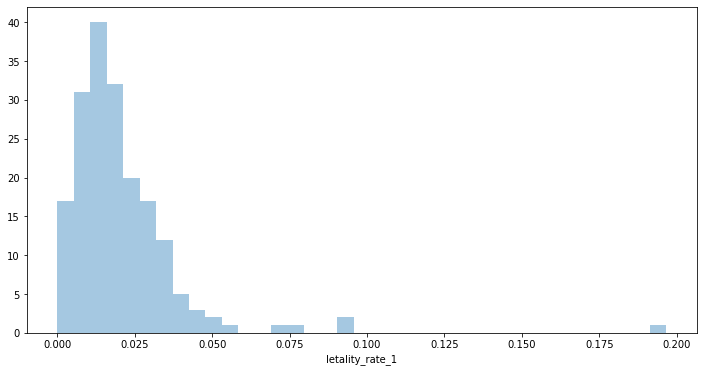

In [112]:
# distribuição
plt.figure(figsize = (12, 6))
sns.distplot(combined.query('confirmed > 40')['letality_rate_1'], kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


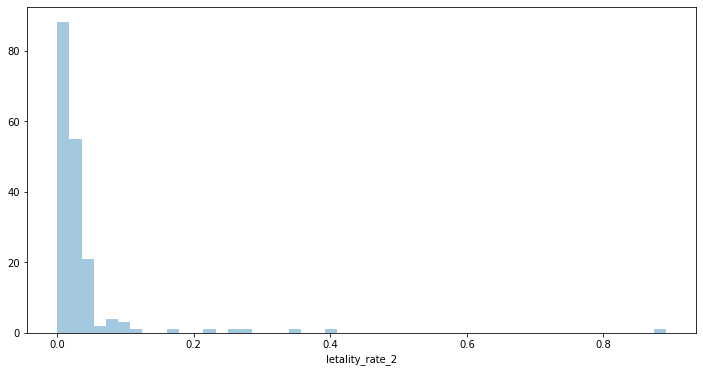

In [113]:
# distribuição
plt.figure(figsize = (12, 6))
sns.distplot(combined.query('recovered > 40')['letality_rate_2'], kde = False)

In [114]:
combined.sort_values('letality_rate_1', ascending = False).query('confirmed > 40').head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,6862,1349,3743,0.196590,0.264925
Peru,2003625,188708,1962124,0.094183,0.087737
Mexico,2454176,230150,1954251,0.093779,0.105361
Sudan,36203,2732,29994,0.075463,0.083481
Syria,24814,1810,21675,0.072943,0.077070
Egypt,273182,15623,201038,0.057189,0.072108
Somalia,14817,774,7043,0.052237,0.099015
Ecuador,438934,21048,398645,0.047953,0.050151
China,103380,4846,97993,0.046876,0.047122
